# Observer 20200809 ktrees

In [1]:

import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import torchvision
from torchvision import transforms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib
import matplotlib.pyplot as plt
from torch.optim.optimizer import required
from torch.utils.data.dataset import random_split
import scipy
import os
import glob
import pandas as pd
from hyperopt import hp, tpe, fmin, Trials
import pickle

% matplotlib inline

In [12]:
# Load data

# loss_0 = np.load('../20200325/k_tree_loss_0.npy')
# loss_1 = np.load('../20200325/k_tree_loss_1.npy')
# loss_2 = np.load('../20200325/k_tree_loss_2.npy')
# loss_3 = np.load('../20200325/k_tree_loss_3.npy')
# loss_4 = np.load('../20200316/k_tree_acc.npy')

# loss_1[1] = loss_3

# loss = np.concatenate((loss_0,loss_1), 0)
# loss = np.concatenate((loss,loss_2), 0)
# loss = np.concatenate((loss,loss_4.reshape(1,10,6)), 0)

# loss_0_64 = np.load('../20200325/k_tree_loss_0_64.npy')
# loss_1_64 = np.load('../20200325/k_tree_loss_1_64.npy')
# loss_2_64 = np.load('../20200325/k_tree_loss_2_64.npy')
# # loss_4_64 = np.load('./k_tree_loss_4_64.npy')

# loss_64 = np.concatenate((loss_0_64, loss_1_64), 0)
# loss_64 = np.concatenate((loss_64, loss_2_64), 0)
# # loss_64 = np.concatenate((loss_64, loss_4_64), 0)


# # loss = np.concatenate((loss, loss_64), 2)

# acc_0 = np.load('../20200325/k_tree_acc_0.npy')
# acc_1 = np.load('../20200325/k_tree_acc_1.npy')
# acc_2 = np.load('../20200325/k_tree_acc_2.npy')
# acc_3 = np.load('../20200325/k_tree_acc_3.npy')
# acc_4 = np.load('../20200316/k_tree_loss.npy')

# acc_1[1] = acc_3

# acc = np.concatenate((acc_0,acc_1), 0)
# acc = np.concatenate((acc,acc_2), 0)
# acc = np.concatenate((acc, acc_4.reshape(1,10,6)), 0)


# acc_0_64 = np.load('../20200325/k_tree_acc_0_64.npy')
# acc_1_64 = np.load('../20200325/k_tree_acc_1_64.npy')
# acc_2_64 = np.load('../20200325/k_tree_acc_2_64.npy')
# # acc_4_64 = np.load('./k_tree_acc_4_64.npy')

# acc_64 = np.concatenate((acc_0_64, acc_1_64), 0)
# acc_64 = np.concatenate((acc_64, acc_2_64), 0)
# # acc_64 = np.concatenate((acc_64, acc_4_64), 0)


# # acc = np.concatenate((acc, acc_64), 2)

# acc_fc_old = np.load('../20200325/fc_acc.npy')
# acc_fc_emnist_old = np.load('../20200325/fc_acc_emnist.npy')
# acc_fc_cifar10_old = np.load('../20200325/fc_acc_cifar10.npy')
# acc_fc_old[3] = acc_fc_emnist_old
# acc_fc_old = np.concatenate((acc_fc_old, acc_fc_cifar10_old), 0)

acc_fc = np.load('../20200513/fc_acc.npy')

acc_fc_new = np.load('../20200809/fcnn_acc_0.npy')

# acc_fc = np.load('./fc_acc.npy')

# acc_lin_old = np.load('../20200325/lda_score_test.npy')
# acc_lin_emnist_old = np.load('../20200325/lda_score_test_emnist.npy')
# acc_lin_cifar10_old= np.load('../20200325/lda_score_test_cifar10.npy')
# acc_lin_old[3] = acc_lin_emnist_old
# acc_lin_old = np.concatenate((acc_lin_old, acc_lin_cifar10_old), 0)

acc_lin = np.load('../20200513/lda_score_test.npy')

# Load randomized input data
# rand_acc_0_old = np.load('../20200504/k_tree_acc_rand_0.npy')
# rand_acc_1_old = np.load('../20200504/k_tree_acc_rand_1.npy')
# rand_acc_2_old = np.load('../20200504/k_tree_acc_rand_2.npy')
# rand_acc_3_old = np.load('../20200504/k_tree_acc_rand_3.npy')

# rand_acc_old = np.concatenate((rand_acc_0_old,rand_acc_1_old), 0)
# rand_acc_old = np.concatenate((rand_acc_old,rand_acc_2_old), 0)
# rand_acc_old = np.concatenate((rand_acc_old, rand_acc_3_old.reshape(1,10,6)), 0)


# rand_acc_0 = np.load('../20200513/k_tree_acc_rand_0.npy')
# rand_acc_1 = np.load('../20200513/k_tree_acc_rand_1.npy')
# rand_acc_2 = np.load('../20200513/k_tree_acc_rand_2.npy')
# rand_acc_3 = np.load('../20200513/k_tree_acc_rand_3.npy')

# rand_acc = np.concatenate((rand_acc_0,rand_acc_1), 0)
# rand_acc = np.concatenate((rand_acc,rand_acc_2), 0)
# rand_acc = np.concatenate((rand_acc, rand_acc_3.reshape(1,10,6)), 0)

rand_acc = np.load('../20200809/ktree_acc_rand_0.npy')


#Load permuted input data
# perm_acc_0_old = np.load('../20200508/k_tree_acc_permute_0.npy')
# perm_acc_1_old = np.load('../20200508/k_tree_acc_permute_1.npy')
# perm_acc_2_old = np.load('../20200508/k_tree_acc_permute_2.npy')
# perm_acc_3_old = np.load('../20200508/k_tree_acc_permute_3.npy')

# perm_acc_old = np.concatenate((perm_acc_0_old,perm_acc_1_old), 0)
# perm_acc_old = np.concatenate((perm_acc_old,perm_acc_2_old), 0)
# perm_acc_old = np.concatenate((perm_acc_old, perm_acc_3_old.reshape(1,10,6)), 0)

# perm_acc_0 = np.load('../20200513/k_tree_acc_permute_0.npy')
# perm_acc_1 = np.load('../20200513/k_tree_acc_permute_1.npy')
# perm_acc_2 = np.load('../20200513/k_tree_acc_permute_2.npy')
# perm_acc_3 = np.load('../20200513/k_tree_acc_permute_3.npy')

# perm_acc = np.concatenate((perm_acc_0,perm_acc_1), 0)
# perm_acc = np.concatenate((perm_acc,perm_acc_2), 0)
# perm_acc = np.concatenate((perm_acc, perm_acc_3.reshape(1,10,6)), 0)

perm_acc = np.load('../20200809/ktree_acc_perm_0.npy')

# Load original input data
# orig_acc_0_old = np.load('../20200511/k_tree_acc_orig_0.npy')
# orig_acc_1_old = np.load('../20200511/k_tree_acc_orig_1.npy')
# orig_acc_2_old = np.load('../20200511/k_tree_acc_orig_2.npy')
# orig_acc_3_old = np.load('../20200511/k_tree_acc_orig_3.npy')

# orig_acc_old = np.concatenate((orig_acc_0_old,orig_acc_1_old), 0)
# orig_acc_old = np.concatenate((orig_acc_old,orig_acc_2_old), 0)
# orig_acc_old = np.concatenate((orig_acc_old, orig_acc_3_old.reshape(1,10,6)), 0)


# orig_acc_0 = np.load('../20200513/k_tree_acc_orig_0.npy')
# orig_acc_1 = np.load('../20200513/k_tree_acc_orig_1.npy')
# orig_acc_2 = np.load('../20200513/k_tree_acc_orig_2.npy')
# orig_acc_3 = np.load('../20200513/k_tree_acc_orig_3.npy')

# orig_acc = np.concatenate((orig_acc_0,orig_acc_1), 0)
# orig_acc = np.concatenate((orig_acc,orig_acc_2), 0)
# orig_acc = np.concatenate((orig_acc, orig_acc_3.reshape(1,10,6)), 0)

# acc_old = orig_acc_old
# acc = orig_acc

acc = np.load('../20200809/ktree_acc_orig_0.npy')
acc_2 = np.load('../20200809/ktree_acc_orig_2.npy')
acc_3 = np.load('../20200809/ktree_acc_orig_3.npy')
acc[4:6] = acc_2
acc[6] = acc_3

In [13]:
acc

array([[[0.9553102 , 0.94006309, 0.9426919 , 0.94532072, 0.94847529,
         0.96267087],
        [0.53101998, 0.93796004, 0.95005258, 0.95057834, 0.95478444,
         0.9595163 ],
        [0.53101998, 0.93322818, 0.93901157, 0.95005258, 0.95899054,
         0.97055731],
        [0.91219769, 0.53101998, 0.92797056, 0.946898  , 0.95793901,
         0.96529968],
        [0.90063091, 0.89274448, 0.9637224 , 0.94742376, 0.95688749,
         0.9595163 ],
        [0.53101998, 0.93427971, 0.53101998, 0.94164038, 0.94794953,
         0.96004206],
        [0.92113565, 0.93690852, 0.95688749, 0.95268139, 0.94742376,
         0.96635121],
        [0.93796004, 0.87118822, 0.93690852, 0.96214511, 0.9679285 ,
         0.96845426],
        [0.90431125, 0.53101998, 0.9426919 , 0.96267087, 0.96582545,
         0.95636172],
        [0.92218717, 0.94794953, 0.95373291, 0.95057834, 0.96687697,
         0.96635121]],

       [[0.806     , 0.8165    , 0.812     , 0.805     , 0.822     ,
         0.826     

In [4]:
# trees_set = [1,2,4,8,16,32, 64, 128]
trees_set = [1,2,4,8,16,32]

# ds_set = ['mnist','fmnist','kmnist','emnist','svhn','usps']
ds_set = ['MNIST','FMNIST','KMNIST','EMNIST','SVHN','USPS','CIFAR10']

In [5]:
classes = np.load('../20200511/classes.npy', allow_pickle=True)
classes

array([[3, 5, 'mnist'],
       [0, 6, 'fmnist'],
       [2, 6, 'kmnist'],
       [14, 17, 'emnist'],
       [5, 6, 'svhn'],
       [3, 5, 'usps'],
       [3, 5, 'cifar10']], dtype=object)

In [6]:
def mean_std(acc_array, ds, cutoff=0.50):
    idx_all = []
    mean_idx = np.zeros(6)
    std_idx = np.zeros(6)
    count_idx = np.zeros(6)
    
    for i in range(6):
        idxt = np.where(acc_array[ds,:,i] > cutoff)
        idx_all.append(idxt)

    for j in range(6):
        count_idx[j] = len(idx_all[j][0])
        mean_idx[j] = np.mean(acc_array[ds,idx_all[j],j]) 
        std_idx[j] = np.std(acc_array[ds,idx_all[j],j]) 
    
    return(mean_idx, std_idx, count_idx)
    
    

ds = 0

mean_std(acc_fc_new,ds)

def comparison(acc_array_1, acc_array_2, ds, trees_set):
    
    compare = np.zeros(6)
    
    idx_1 = []
    for i in range(6):
        idx = np.where(acc_array_1[ds,:,i] > 0.50)
        idx = idx[0]
        idx = idx.tolist()
        idx_1.append(idx)

    
    idx_2 = []
    for i in range(6):
        idx = np.where(acc_array_2[ds,:,i] > 0.50)
        idx = idx[0]
        idx = idx.tolist()
        idx_2.append(idx)
    
    
    for j in range(6):
#         print(acc_array_1[ds,idx_1[j], j])
        _, compare[j] = scipy.stats.ttest_ind(acc_array_1[ds,idx_1[j],j], acc_array_2[ds,idx_2[j],j])
#         print(compare)
    return(compare)

In [16]:
acc_lin

array([[0.88643533, 0.85488959, 0.86119874, 0.88801262, 0.86908517,
        0.88748686, 0.87329127, 0.86855941, 0.89221872, 0.87171399],
       [0.6795    , 0.673     , 0.6755    , 0.703     , 0.6665    ,
        0.6645    , 0.674     , 0.6715    , 0.68      , 0.663     ],
       [0.7       , 0.6825    , 0.679     , 0.666     , 0.704     ,
        0.671     , 0.6695    , 0.6955    , 0.6475    , 0.675     ],
       [0.54810496, 0.55612245, 0.57944606, 0.5787172 , 0.59548105,
        0.57507289, 0.59693878, 0.58381924, 0.59912536, 0.60787172],
       [0.52212795, 0.53473974, 0.51180922, 0.53107086, 0.51570741,
        0.50699381, 0.51662463, 0.53061224, 0.5024077 , 0.51433158],
       [0.85582822, 0.80981595, 0.86503067, 0.80368098, 0.85889571,
        0.76687117, 0.85276074, 0.86196319, 0.8404908 , 0.84662577],
       [0.532     , 0.5135    , 0.5175    , 0.528     , 0.531     ,
        0.5185    , 0.5365    , 0.529     , 0.526     , 0.522     ]])

lin n =  10

Original Input

kTree Values
1 : 0.9220 +/- 0.0179, n = 7
2 : 0.9243 +/- 0.0254, n = 8
4 : 0.9460 +/- 0.0105, n = 9
8 : 0.9510 +/- 0.0064, n = 10
16 : 0.9573 +/- 0.0074, n = 10
32 : 0.9635 +/- 0.0043, n = 10

FCNN Values
1 : 0.9546 +/- 0.0053, n = 10
2 : 0.9567 +/- 0.0057, n = 10
4 : 0.9583 +/- 0.0041, n = 10
8 : 0.9629 +/- 0.0039, n = 10
16 : 0.9662 +/- 0.0035, n = 10
32 : 0.9696 +/- 0.0053, n = 10

Bounds
lda: 0.8753 +/- 0.0120

Comparisons
1 v fcnn: 0.0223 
2 v fcnn: 0.0505 
4 v fcnn: 0.2125 
8 v fcnn: 0.0002 
16 v fcnn: 0.0042 
32 v fcnn: 0.0156 


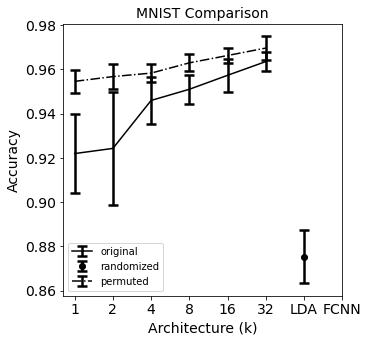

lin n =  10

Original Input

kTree Values
1 : 0.7900 +/- 0.0202, n = 10
2 : 0.8122 +/- 0.0099, n = 9
4 : 0.7937 +/- 0.0443, n = 10
8 : 0.8184 +/- 0.0058, n = 10
16 : 0.8254 +/- 0.0073, n = 10
32 : 0.8300 +/- 0.0063, n = 10

FCNN Values
1 : 0.8262 +/- 0.0063, n = 10
2 : 0.8286 +/- 0.0041, n = 10
4 : 0.8280 +/- 0.0065, n = 10
8 : 0.8299 +/- 0.0085, n = 10
16 : 0.8307 +/- 0.0049, n = 10
32 : 0.8290 +/- 0.0075, n = 10

Bounds
lda: 0.6750 +/- 0.0108

Comparisons
1 v fcnn: 0.0001 
2 v fcnn: 0.0003 
4 v fcnn: 0.0342 
8 v fcnn: 0.0035 
16 v fcnn: 0.0891 
32 v fcnn: 0.7516 


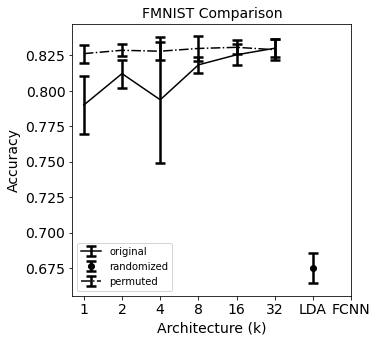

lin n =  10

Original Input

kTree Values
1 : 0.8035 +/- 0.0488, n = 10
2 : 0.8246 +/- 0.0376, n = 9
4 : 0.8549 +/- 0.0111, n = 10
8 : 0.8686 +/- 0.0118, n = 10
16 : 0.8704 +/- 0.0098, n = 10
32 : 0.8791 +/- 0.0113, n = 10

FCNN Values
1 : 0.8674 +/- 0.0188, n = 10
2 : 0.8774 +/- 0.0131, n = 10
4 : 0.8820 +/- 0.0157, n = 10
8 : 0.8898 +/- 0.0150, n = 10
16 : 0.9009 +/- 0.0104, n = 10
32 : 0.9088 +/- 0.0080, n = 10

Bounds
lda: 0.6790 +/- 0.0164

Comparisons
1 v fcnn: 0.0018 
2 v fcnn: 0.0010 
4 v fcnn: 0.0005 
8 v fcnn: 0.0038 
16 v fcnn: 0.0000 
32 v fcnn: 0.0000 


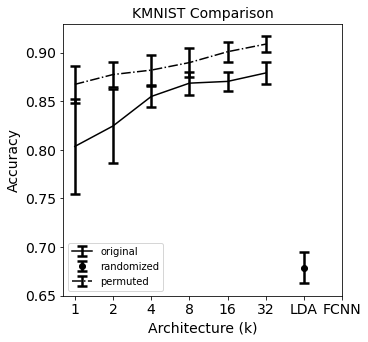

lin n =  10

Original Input

kTree Values
1 : 0.8524 +/- 0.1520, n = 10
2 : 0.9722 +/- 0.0069, n = 10
4 : 0.9398 +/- 0.1066, n = 10
8 : 0.9816 +/- 0.0026, n = 10
16 : 0.9832 +/- 0.0048, n = 10
32 : 0.9851 +/- 0.0029, n = 10

FCNN Values
1 : 0.9779 +/- 0.0046, n = 10
2 : 0.9816 +/- 0.0036, n = 10
4 : 0.9824 +/- 0.0030, n = 10
8 : 0.9826 +/- 0.0037, n = 10
16 : 0.9835 +/- 0.0039, n = 10
32 : 0.9846 +/- 0.0034, n = 10

Bounds
lda: 0.5821 +/- 0.0180

Comparisons
1 v fcnn: 0.0235 
2 v fcnn: 0.0018 
4 v fcnn: 0.2466 
8 v fcnn: 0.5330 
16 v fcnn: 0.8897 
32 v fcnn: 0.7357 


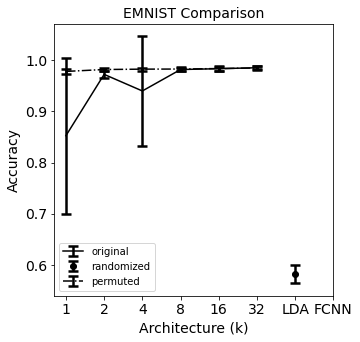

lin n =  10

Original Input

kTree Values
1 : 0.5811 +/- 0.0412, n = 8
2 : 0.6031 +/- 0.0527, n = 7
4 : 0.5797 +/- 0.0428, n = 10
8 : 0.5940 +/- 0.0530, n = 10
16 : 0.6243 +/- 0.0508, n = 10
32 : 0.6036 +/- 0.0661, n = 9

FCNN Values
1 : 0.6117 +/- 0.0844, n = 8
2 : 0.6318 +/- 0.1011, n = 10
4 : 0.6325 +/- 0.1112, n = 6
8 : 0.6346 +/- 0.1184, n = 10
16 : 0.6905 +/- 0.1001, n = 10
32 : 0.7794 +/- 0.0301, n = 9

Bounds
lda: 0.5186 +/- 0.0102

Comparisons
1 v fcnn: 0.3297 
2 v fcnn: 0.1964 
4 v fcnn: 0.6815 
8 v fcnn: 0.3602 
16 v fcnn: 0.0935 
32 v fcnn: 0.0004 


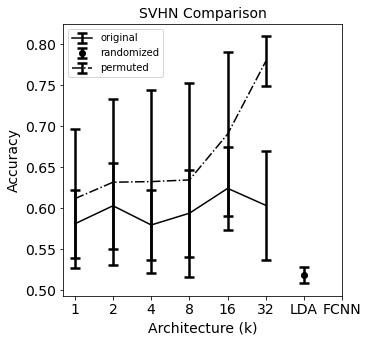

lin n =  10

Original Input

kTree Values
1 : 0.8221 +/- 0.0465, n = 7
2 : 0.8731 +/- 0.0129, n = 8
4 : 0.8256 +/- 0.1052, n = 7
8 : 0.8783 +/- 0.0179, n = 6
16 : 0.8873 +/- 0.0151, n = 8
32 : 0.8981 +/- 0.0080, n = 9

FCNN Values
1 : 0.8971 +/- 0.0199, n = 9
2 : 0.9021 +/- 0.0179, n = 10
4 : 0.9031 +/- 0.0177, n = 10
8 : 0.9055 +/- 0.0157, n = 10
16 : 0.9037 +/- 0.0148, n = 10
32 : 0.9067 +/- 0.0169, n = 10

Bounds
lda: 0.8362 +/- 0.0306

Comparisons
1 v fcnn: 0.0544 
2 v fcnn: 0.0923 
4 v fcnn: 0.0143 
8 v fcnn: 0.0099 
16 v fcnn: 0.0871 
32 v fcnn: 0.2429 


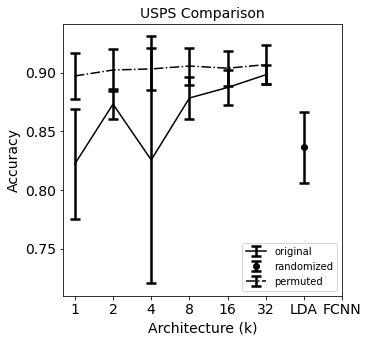

lin n =  10

Original Input

kTree Values
1 : 0.5605 +/- 0.0140, n = 6
2 : 0.5618 +/- 0.0164, n = 4
4 : 0.5658 +/- 0.0135, n = 8
8 : 0.5736 +/- 0.0086, n = 6
16 : 0.5791 +/- 0.0108, n = 7
32 : 0.5784 +/- 0.0111, n = 7

FCNN Values
1 : 0.5592 +/- 0.0148, n = 9
2 : 0.5656 +/- 0.0080, n = 8
4 : 0.5805 +/- 0.0066, n = 10
8 : 0.5742 +/- 0.0124, n = 10
16 : 0.5721 +/- 0.0068, n = 10
32 : 0.5654 +/- 0.0104, n = 10

Bounds
lda: 0.5254 +/- 0.0069

Comparisons
1 v fcnn: 0.9345 
2 v fcnn: 0.5928 
4 v fcnn: 0.0116 
8 v fcnn: 0.9277 
16 v fcnn: 0.6013 
32 v fcnn: 0.0344 


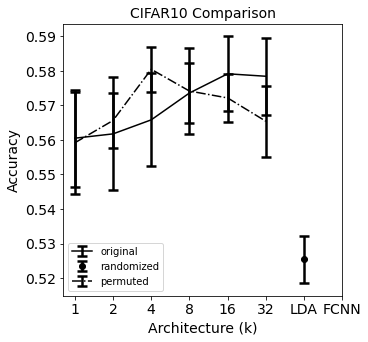

In [18]:
# Plot orig only with new fcnn
cutoff = 0.535

for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))
        
    # Orig
    acc_mean, acc_std, counts = mean_std(acc, ds, cutoff)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='black')
    
#     # Rand
#     rand_acc_mean, rand_acc_std, rand_counts = mean_std(rand_acc, ds, cutoff)
    
#     ax.errorbar(x, rand_acc_mean, yerr=rand_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
#     # Perm
#     perm_acc_mean, perm_acc_std, perm_counts = mean_std(perm_acc, ds, cutoff)

#     ax.errorbar(x, perm_acc_mean, yerr=perm_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='blue')

    # LDA
    idxl = np.where(acc_lin[ds,:] > 0.50)[0]
    print('lin n = ', len(idxl))
    acc_lin_mean = np.mean(acc_lin[ds,idxl])
    acc_lin_std = np.std(acc_lin[ds,idxl])
    
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    # FCNN
#     idxf = np.where(acc_fc[ds,:] > 0.50)[0]
#     print('fc n = ', len(idxf))
#     acc_fc_mean = np.mean(acc_fc[ds,idxf])
#     acc_fc_std = np.std(acc_fc[ds,idxf])
#     ax.errorbar(7, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    acc_fc_mean, acc_fc_std, fc_counts = mean_std(acc_fc_new, ds, cutoff)
    ax.errorbar(x, acc_fc_mean, yerr=acc_fc_std, capsize=5, capthick=2.5, elinewidth=2.5, ls='-.', c='black')

    ax.set_xticks(np.arange(len(trees_set)+2))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA'],['FCNN']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['original','randomized','permuted'])


    print('\nOriginal Input')
    print('\nkTree Values')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f, n = %d' % (n_tree, acc_mean[j], acc_std[j], counts[j]))
        
    print('\nFCNN Values')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f, n = %d' % (n_tree, acc_fc_mean[j], acc_fc_std[j], fc_counts[j]))
        
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    
    print('\nComparisons')
    comparisons = comparison(acc, acc_fc_new, ds, trees_set)
    for j, n_tree in enumerate(trees_set):
        print('%s v fcnn: %.4f ' % (n_tree, comparisons[j]))


#     print('\nPermuted Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f, n = %d' % (n_tree, perm_acc_mean[j], perm_acc_std[j], perm_counts[j]))
        
#     print('\nComparisons')
#     comparisons = comparison(perm_acc, acc_fc_new, ds, trees_set)
#     for j, n_tree in enumerate(trees_set):
#         print('%s v fcnn: %.4f ' % (n_tree, comparisons[j]))
        

#     print('\nOriginal Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, acc_mean[j], acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(acc[ds,idx,0], acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    
#     print('\nPermuted Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, perm_acc_mean[j], perm_acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(perm_acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(perm_acc[ds,idx,0], perm_acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(perm_acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
#     print('\nRandom Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, rand_acc_mean[j], rand_acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(rand_acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(rand_acc[ds,idx,0], rand_acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(rand_acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
#     plt.savefig(ds_name+'_rand_perm.svg', format='svg')
    
    plt.show()


In [ ]:
# Plot orig, perm, rand


for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))

    idx = np.where(acc[ds,:,-1] != 0)[-1]
    print('n =',len(idx))
    acc_mean = np.mean(acc[ds,idx,:], axis=0)
    acc_std = np.std(acc[ds,idx,:], axis=0)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='black')
    
    rand_idx = np.where(rand_acc[ds,:,-1] > 0.50)[-1]
    print('n =',len(rand_idx))
    rand_acc_mean = np.mean(rand_acc[ds,rand_idx,:], axis=0)
    rand_acc_std = np.std(rand_acc[ds,rand_idx,:], axis=0)

    ax.errorbar(x, rand_acc_mean, yerr=rand_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
    perm_idx = np.where(perm_acc[ds,:,-1] > 0.50)[-1]
    print('n =',len(perm_idx))
    perm_acc_mean = np.mean(perm_acc[ds,perm_idx,:], axis=0)
    perm_acc_std = np.std(perm_acc[ds,perm_idx,:], axis=0)

    ax.errorbar(x, perm_acc_mean, yerr=perm_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='blue')


    idxl = np.where(acc_lin[ds,:] > 0.50)[0]
    print('lin n = ', len(idxl))
    acc_lin_mean = np.mean(acc_lin[ds,idxl])
    acc_lin_std = np.std(acc_lin[ds,idxl])
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idxf = np.where(acc_fc[ds,:] > 0.50)[0]
    print('fc n = ', len(idxf))
    acc_fc_mean = np.mean(acc_fc[ds,idxf])
    acc_fc_std = np.std(acc_fc[ds,idxf])
    ax.errorbar(7, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    ax.set_xticks(np.arange(len(trees_set)+2))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA'],['FCNN']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['original','randomized','permuted'])


        
    print('\nOriginal Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, acc_mean[j], acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(acc[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(acc[ds,idx,0], acc[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(acc[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    
    print('\nPermuted Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, perm_acc_mean[j], perm_acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(perm_acc[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(perm_acc[ds,idx,0], perm_acc[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(perm_acc[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    print('\nRandom Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, rand_acc_mean[j], rand_acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(rand_acc[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(rand_acc[ds,idx,0], rand_acc[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(rand_acc[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    plt.savefig(ds_name+'_rand_perm.svg', format='svg')
    
    plt.show()


In [ ]:

for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))

    idx = np.where(acc_old[ds,:,-1] != 0)[-1]
    print('n =',len(idx))
    acc_mean = np.mean(acc_old[ds,idx,:], axis=0)
    print(acc_mean.shape)
    acc_std = np.std(acc_old[ds,idx,:], axis=0)
    print(acc_std.shape)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='black')
    
    rand_idx = np.where(rand_acc_old[ds,:,-1] > 0.50)[-1]
    print('n =',len(rand_idx))
    rand_acc_mean = np.mean(rand_acc_old[ds,rand_idx,:], axis=0)
    print(rand_acc_mean.shape)
    rand_acc_std = np.std(rand_acc_old[ds,rand_idx,:], axis=0)
    print(rand_acc_std.shape)

    ax.errorbar(x, rand_acc_mean, yerr=rand_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
    perm_idx = np.where(perm_acc_old[ds,:,-1] > 0.50)[-1]
    print('n =',len(perm_idx))
    perm_acc_mean = np.mean(perm_acc_old[ds,perm_idx,:], axis=0)
    print(perm_acc_mean.shape)
    perm_acc_std = np.std(perm_acc_old[ds,perm_idx,:], axis=0)
    print(perm_acc_std.shape)

    ax.errorbar(x, perm_acc_mean, yerr=perm_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='blue')


    idxl = np.where(acc_lin_old[ds,:] > 0.50)[0]
    print('lin n = ', len(idxl))
    acc_lin_mean = np.mean(acc_lin_old[ds,idxl])
    acc_lin_std = np.std(acc_lin_old[ds,idxl])
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idxf = np.where(acc_fc_old[ds,:] > 0.50)[0]
    print('fc n = ', len(idxf))
    acc_fc_mean = np.mean(acc_fc_old[ds,idxf])
    acc_fc_std = np.std(acc_fc_old[ds,idxf])
    ax.errorbar(7, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    ax.set_xticks(np.arange(len(trees_set)+2))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA'],['FCNN']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['original','randomized','permuted'])

    
    print('\nOriginal Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, acc_mean[j], acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(acc_old[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(acc_old[ds,idx,0], acc_old[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(acc_old[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    
    print('\nPermuted Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, perm_acc_mean[j], perm_acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(perm_acc_old[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(perm_acc_old[ds,idx,0], perm_acc_old[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(perm_acc_old[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    print('\nRandom Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, rand_acc_mean[j], rand_acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(rand_acc_old[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(rand_acc_old[ds,idx,0], rand_acc_old[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(rand_acc_old[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    plt.savefig(ds_name+'_rand_perm_old.svg', format='svg')
    
    plt.show()


In [ ]:

for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))

    idx = np.where(acc[ds,:,-1] != 0)[-1]
    print('n =',len(idx))
    acc_mean = np.mean(acc[ds,idx,:], axis=0)
    acc_std = np.std(acc[ds,idx,:], axis=0)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='black')
    
    idx_old = np.where(acc_old[ds,:,-1] != 0)[-1]
    print('n =',len(idx_old))
    acc_mean_old = np.mean(acc_old[ds,idx_old,:], axis=0)
    acc_std_old = np.std(acc_old[ds,idx_old,:], axis=0)

    ax.errorbar(x, acc_mean_old, yerr=acc_std_old, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
#     rand_idx = np.where(rand_acc[ds,:,-1] > 0.50)[-1]
#     print('n =',len(rand_idx))
#     rand_acc_mean = np.mean(rand_acc[ds,rand_idx,:], axis=0)
#     rand_acc_std = np.std(rand_acc[ds,rand_idx,:], axis=0)

#     ax.errorbar(x, rand_acc_mean, yerr=rand_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
#     perm_idx = np.where(perm_acc[ds,:,-1] > 0.50)[-1]
#     print('n =',len(perm_idx))
#     perm_acc_mean = np.mean(perm_acc[ds,perm_idx,:], axis=0)
#     perm_acc_std = np.std(perm_acc[ds,perm_idx,:], axis=0)

#     ax.errorbar(x, perm_acc_mean, yerr=perm_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='blue')


    idxl = np.where(acc_lin[ds,:] > 0.50)[0]
    print('lin n = ', len(idxl))
    acc_lin_mean = np.mean(acc_lin[ds,idxl])
    acc_lin_std = np.std(acc_lin[ds,idxl])
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idxf = np.where(acc_fc[ds,:] > 0.50)[0]
    print('fc n = ', len(idxf))
    acc_fc_mean = np.mean(acc_fc[ds,idxf])
    acc_fc_std = np.std(acc_fc[ds,idxf])
    ax.errorbar(7, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    ax.set_xticks(np.arange(len(trees_set)+2))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA'],['FCNN']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['original','randomized','permuted'])


        
#     print('\nOriginal Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, acc_mean[j], acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(acc[ds,idx,0], acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    
#     print('\nPermuted Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, perm_acc_mean[j], perm_acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(perm_acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(perm_acc[ds,idx,0], perm_acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(perm_acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
#     print('\nRandom Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, rand_acc_mean[j], rand_acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(rand_acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(rand_acc[ds,idx,0], rand_acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(rand_acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
#     plt.savefig(ds_name+'_rand_perm.svg', format='svg')
    
    plt.show()

    

n = 10
()
()
1: 0.9234 +/- 0.0120
lda: 0.8788 +/- 0.0086
fcnn: 0.9711 +/- 0.0118


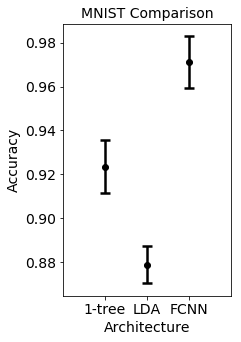

n = 10
()
()
1: 0.8051 +/- 0.0217
lda: 0.6849 +/- 0.0110
fcnn: 0.8880 +/- 0.0200


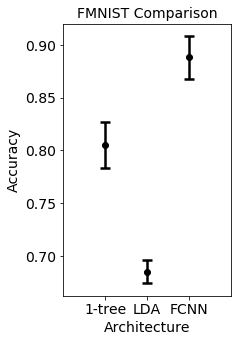

n = 10
()
()
1: 0.8193 +/- 0.0190
lda: 0.7087 +/- 0.0194
fcnn: 0.9720 +/- 0.0110


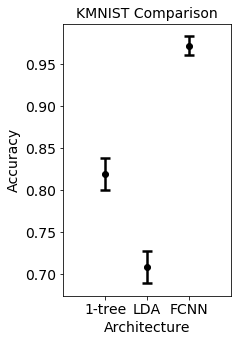

n = 10
()
()
1: 0.9586 +/- 0.0105
lda: 0.5886 +/- 0.0209
fcnn: 0.9883 +/- 0.0131


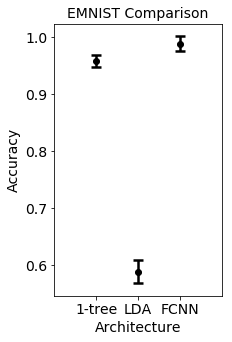

n = 10
()
()
1: 0.7043 +/- 0.0734
lda: 0.5278 +/- 0.0075
fcnn: 0.7500 +/- 0.1876


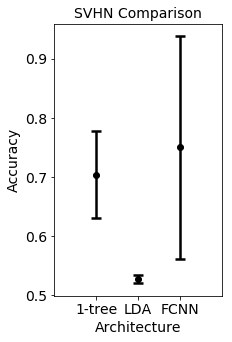

n = 10
()
()
1: 0.9719 +/- 0.0137
lda: 0.9059 +/- 0.0114
fcnn: 1.0000 +/- 0.0000


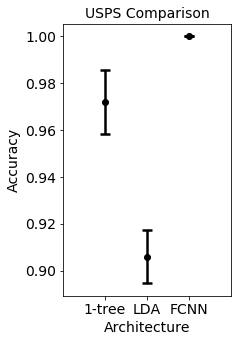

n = 10
()
()
1: 0.6385 +/- 0.0095
lda: 0.5796 +/- 0.0119
fcnn: 0.6550 +/- 0.0796


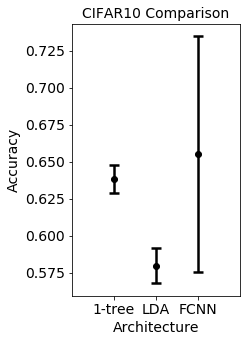

In [58]:

for ds, ds_name in enumerate(ds_set):


    fig, ax = plt.subplots(figsize=(3,5))
    
    x = [0]


    idx = np.where(acc[ds,:,-1] != 0)[-1]
    print('n =',len(idx))
    acc_mean = np.mean(acc[ds,idx,0], axis=0)
    print(acc_mean.shape)
    acc_std = np.std(acc[ds,idx,0], axis=0)
    print(acc_std.shape)

    ax.errorbar(1, acc_mean, yerr=acc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idx = np.where(acc_lin[ds,:] > 0.50)[0]
    acc_lin_mean = np.mean(acc_lin[ds,idx])
    acc_lin_std = np.std(acc_lin[ds,idx])
    ax.errorbar(2, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idx = np.where(acc_fc[ds,:] > 0.50)[0]
    acc_fc_mean = np.mean(acc_fc[ds,idx])
    acc_fc_std = np.std(acc_fc[ds,idx])
    ax.errorbar(3, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    ax.set_xticks([1,2,3])
    ax.set_xticklabels(['1-tree', 'LDA','FCNN'], fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture', fontsize=14)

    ax.set_xlim(left=0, right=4)
    ax.set_title(ds_name+' Comparison', fontsize=14)
#     ax.legend(['1-tree','linear (lda)','fcnn'])
    
    print('1: %.4f +/- %.4f' % (acc_mean, acc_std))
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    plt.savefig(ds_name+'_single.svg', format='svg')
    
    plt.show()


In [63]:
torch.__version__

'1.4.0'

In [64]:
torchvision.__version__

'0.5.0'

In [66]:
import sklearn
sklearn.__version__

'0.19.2'

In [ ]:
class simple_fcnn(nn.Module):
    '''
    2 layer feed forward neural network. 
    Will code in Linear, Sigmoid, or ReLU activation functions.
    Activation = {'relu', 'sigmoid', 'linear'}
    '''
    
    def __init__(self, Input_size=3072, Hidden_size=3072, Output_size=1, Activation="relu"):
        super(simple_fcnn, self).__init__()
        '''
        Inputs: Input_size, Hidden_size, Output_size
        '''
        # Initialize architecture parameters
        self.Input_size = Input_size
        self.Hidden_size = Hidden_size
        self.Output_size = Output_size
        self.Activation = Activation
        
        
        # Initialize weights through He initialization (by default in nn.Linear)
        
        self.i2h = nn.Linear(Input_size, Hidden_size, bias=True)
        self.i2h.bias = torch.nn.Parameter(torch.zeros_like(self.i2h.bias))
#         self.i2h.weight = torch.nn.init.normal_(self.i2h.weight, mean=0.0, std=math.sqrt(2/(Input_size)))
        self.i2h.weight = torch.nn.init.kaiming_normal_(self.i2h.weight, a=0.01)


        # Initialize densly connected output layer
        self.h2o = nn.Linear(Hidden_size, Output_size)
        self.h2o.bias = torch.nn.Parameter(torch.zeros_like(self.h2o.bias))
        self.h2o.weight = torch.nn.init.kaiming_normal_(self.h2o.weight, a=0.01)
        
        # Initialize nonlinearities
        self.relu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        '''
        Forward step for network. Establishes Architecture.
        Inputs: Input, Hidden
        Outputs: Output, Hidden
        '''
        # Prepare input for appropriate architecture

        
        # Set Activation function to calculate hidden layer

        if self.Activation == 'relu':
            Hidden = self.relu(self.i2h(x))
        else:
            Hidden = self.i2h(x)

        # Calculate Output layer
        Output = self.sigmoid(self.h2o(Hidden))
        return(Output)